<a href="https://colab.research.google.com/github/cbroker1/text-as-data/blob/master/TAD_Week_2_Broker_Carl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TAD_Week_2_Assignment_Broker_Carl**:

---


---



## PART 1


---






In [0]:
# Colab notebooks run on special Google flavor of Linux. Some R packages
# require special OS packages to be installed.
system("apt-get install libpoppler-cpp-dev")

#install packages
install.packages('ggplot2')
install.packages('quanteda')
install.packages('readtext')
install.packages('textstem')
install.packages('scales')
library(ggplot2)
library(quanteda)
library(readtext)
library(textstem)
library(scales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘extrafontdb’, ‘Rttf2pt1’, ‘statnet.common’, ‘ISOcodes’, ‘data.table’, ‘extrafont’, ‘fastmatch’, ‘ggrepel’, ‘network’, ‘RcppParallel’, ‘sna’, ‘SnowballC’, ‘stopwords’, ‘proxyC’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘qpdf’, ‘RCurl’, ‘rjson’, ‘ndjson’, ‘antiword’, ‘pdftools’, ‘readODS’, ‘streamR’, ‘striprtf’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘zoo’, ‘dtt’, ‘sylly.en’, ‘sylly’, ‘syuzhet’, ‘english’, ‘mgsub’, ‘qdapRegex’, ‘slam’, ‘koRpus.lang.en’, ‘hunspell’, ‘koRpus’, ‘lexicon’, ‘textclean’, ‘textshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also 

#1. Read-in the JSON file and create a corpus.



In [0]:
# read-in .json via readtext()
music_raw <- readtext("/content/musical_instruments.json", text_field="reviewText")

File doesn't contain a single valid JSON object.



In [0]:
# remove duplicates
todelete <- seq(1, nrow(music_raw), 2)
music_raw <- music_raw[ todelete ,]

# reset index, and delete col1:
row.names(music_raw) <- NULL
music_raw$doc_id <- NULL

# set new row names, to len of df
row.names(music_raw) <- 1 : nrow(music_raw)

# drop all non-text cols
music_raw <- music_raw$text

# inspect
print(head(music_raw, 10))

 [1] "Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 [2] "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even bett

In [0]:
# generate corpus
music_corpus = corpus(music_raw)

# inspect corpus
head(summary(music_corpus), 10)

,Text,Types,Tokens,Sentences
,<chr>,<int>,<int>,<int>
1,text1,45,57,1
2,text2,81,116,2
3,text3,62,82,4
4,text4,31,37,2
5,text5,28,31,3
6,text6,41,49,6
7,text7,35,41,3
8,text8,98,202,11
9,text9,34,40,4


# 2. Read all Supreme Court opinion PDFs and create a corpus.


In [0]:
# unzip USC_cases.zip in /content/ dir
unzip("USC_Cases.zip")

In [0]:
# set filenames
filenames <- list.files('/content')

# inspect
print(filenames)

 [1] "__MACOSX"                                                                    
 [2] "Brown_Warren_Opinion.pdf"                                                    
 [3] "Miranda_Warren_Opinion.pdf"                                                  
 [4] "musical_instruments.json"                                                    
 [5] "New York Times v. U.S. - Per Curiam.pdf"                                     
 [6] "Plessy v. Ferguson - Justice Brown opinion.pdf"                              
 [7] "Regents of the Univ. of CA v Bakke - Plurality Opinion by Justice Powell.pdf"
 [8] "sample_data"                                                                 
 [9] "USC_Cases.zip"                                                               
[10] "Yick Wo v. California - Justice Matthews opinion.pdf"                        


In [0]:
# from above list, select all .pdf files
a <- readtext("/content/Brown_Warren_Opinion.pdf")
b <- readtext("/content/Miranda_Warren_Opinion.pdf")
c <- readtext("/content/New York Times v. U.S. - Per Curiam.pdf")
d <- readtext("/content/Plessy v. Ferguson - Justice Brown opinion.pdf")
e <- readtext("/content/Regents of the Univ. of CA v Bakke - Plurality Opinion by Justice Powell.pdf")
f <- readtext("/content/Yick Wo v. California - Justice Matthews opinion.pdf")

# concatenate into blank df
court_raw <- rbind(a,b,c,d,e,f)

In [0]:
# generate corpus
court_corpus = corpus(court_raw)

# inspect corpus
summary(court_corpus)

,Text,Types,Tokens,Sentences
,<chr>,<int>,<int>,<int>
1,Brown_Warren_Opinion.pdf,1151,4634,252
2,Miranda_Warren_Opinion.pdf,2818,16580,751
3,New York Times v. U.S. - Per Curiam.pdf,162,377,33
4,Plessy v. Ferguson - Justice Brown opinion.pdf,1195,5360,199
5,Regents of the Univ. of CA v Bakke - Plurality Opinion by Justice Powell.pdf,3802,23883,1506
6,Yick Wo v. California - Justice Matthews opinion.pdf,1013,4003,103


#3. Preprocess the JSON and PDFs:
  - Remove all punctuation
  - Add at least 10 more unique stopwords for each corpus and remove stopwords. 
  - Stem words.

#### 3.1. PDF Pre-Processing:

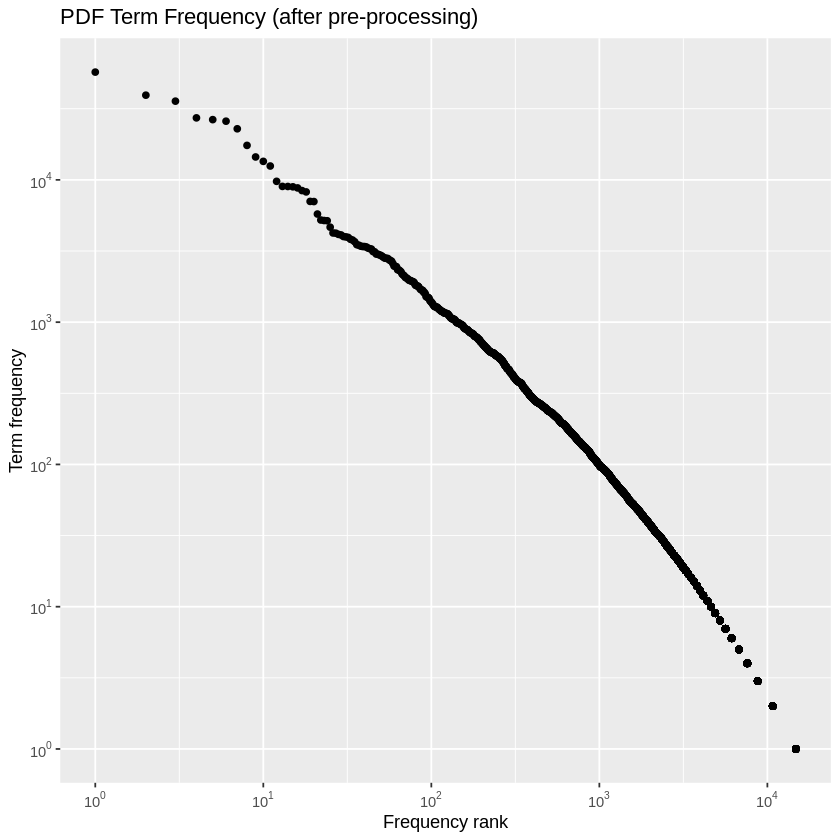

In [0]:
# generate dfm w/o any pre-processing 
music_dfm = dfm(music_corpus, tolower = FALSE, remove_punct = FALSE, stem = FALSE)

# inspect overall feature frequency
textstat_frequency(music_dfm) %>%
  ggplot(aes(x = rank, y = frequency)) +
  geom_point() +
  scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
  labels = trans_format("log10", math_format(10^.x))) +
  scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
  labels = trans_format("log10", math_format(10^.x))) +  
  labs(x = "Frequency rank", y = "Term frequency") +
  ggtitle('PDF Term Frequency (after pre-processing)')

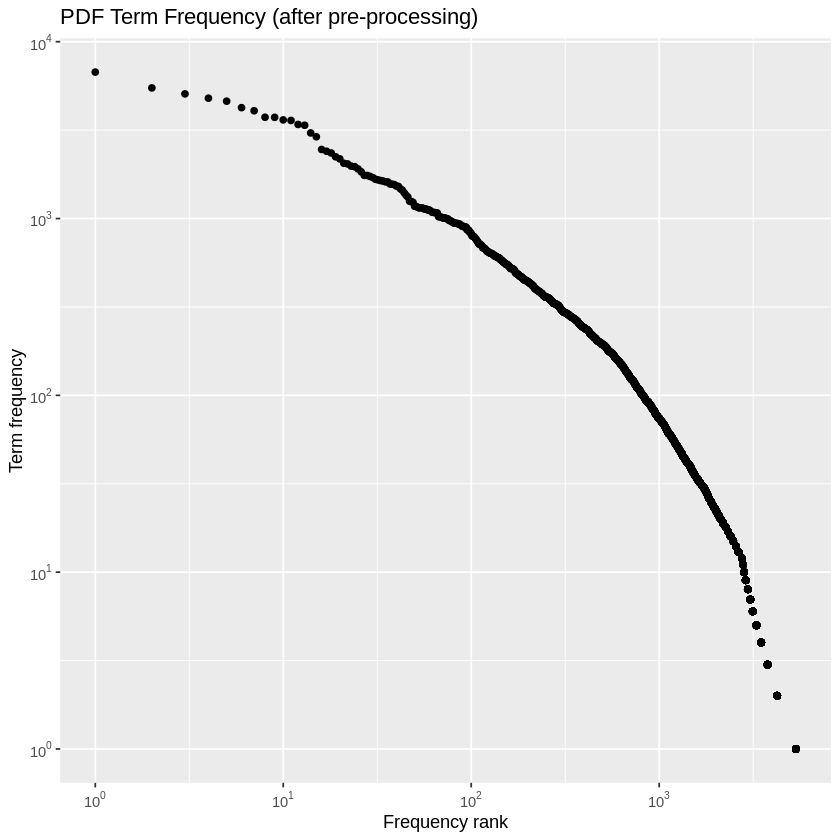

In [0]:
# music pre-processing:


# preform 'lower', 'stopwords', 'punct' and 'stem' steps
music_dfm = dfm(music_corpus, tolower = TRUE, remove = stopwords('english'), remove_punct = TRUE, stem = TRUE)

# calculate tf–idf for music
# the higher the numerical weight value, the rarer the term. 
# the smaller the weight, the more common the term.
music_dfm_tfidf <- dfm_tfidf(music_dfm, scheme_tf = "prop", scheme_df = "inverse", base = 10, force = FALSE)

# find features that have a tf-idf of 0 for all docs and make list
  # code disabled, as it returns 0
# music_stop_words <- colnames(music_dfm_tfidf[, which(colSums(music_dfm_tfidf)==0)])

# find features that have a token-count of <=12 and make list 
music_stop_words <- colnames(music_dfm[, which(colSums(music_dfm)<=12)])

# make new stopwords list
new_stopwords = c(stopwords('english'), music_stop_words)

# re-generate dfm along with new stopwords
music_dfm = dfm(music_corpus, tolower = TRUE, remove = new_stopwords, remove_punct = TRUE, stem = TRUE)

# after pre-processing
textstat_frequency(music_dfm) %>%
  ggplot(aes(x = rank, y = frequency)) +
  geom_point() +
  scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
  labels = trans_format("log10", math_format(10^.x))) +
  scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
  labels = trans_format("log10", math_format(10^.x))) +  
  labs(x = "Frequency rank", y = "Term frequency") +
  ggtitle('PDF Term Frequency (after pre-processing)')

#### 3.2. PDF Pre-Processing:

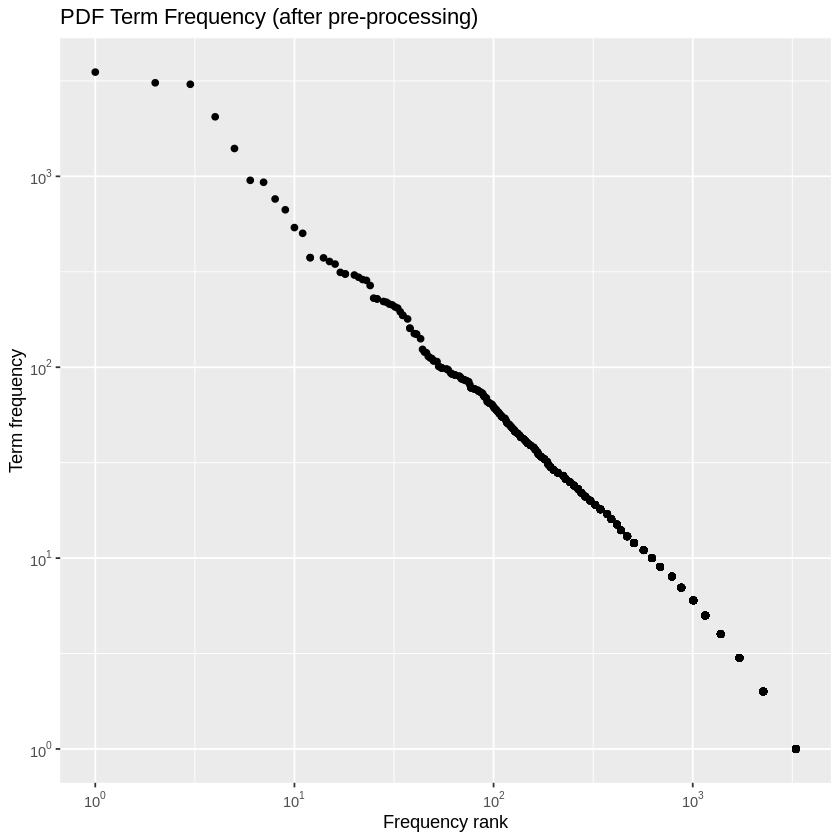

In [0]:
# generate dfm w/o any pre-processing 
court_dfm = dfm(court_corpus, tolower = FALSE, remove_punct = FALSE, stem = FALSE)

# inspect overall feature frequency
textstat_frequency(court_dfm) %>%
  ggplot(aes(x = rank, y = frequency)) +
  geom_point() +
  scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
  labels = trans_format("log10", math_format(10^.x))) +
  scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
  labels = trans_format("log10", math_format(10^.x))) +  
  labs(x = "Frequency rank", y = "Term frequency") +
  ggtitle('PDF Term Frequency (after pre-processing)')

[1] "stopwords I found, and added to stopwords(english)"
 [1] "v"         "opinion"   "court"     "case"      "state"     "order"    
 [7] "unit"      "valid"     "held"      "direct"    "therefor"  "govern"   
[13] "may"       "also"      "process"   "constitut" "appeal"    "s"        
[19] "judgment"  "new"       "see"       "shall"    


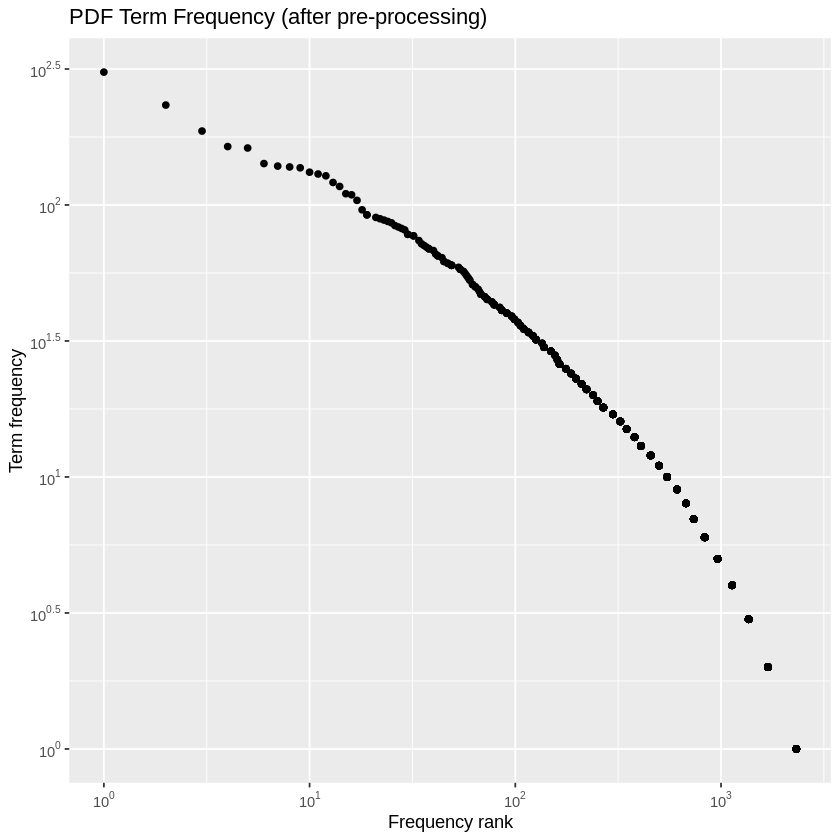

In [0]:
# PDF pre-processing: 


# preform 'lower', 'stopwords', 'punct' and 'stem' steps
court_dfm = dfm(court_corpus, tolower = TRUE, remove = stopwords('english'), remove_punct = TRUE, stem = TRUE)

# calculate tf–idf for features
  # the higher the numerical weight value, the rarer the term. 
  # the smaller the weight, the more common the term.
court_dfm_tfidf <- dfm_tfidf(court_dfm, scheme_tf = "prop", scheme_df = "inverse", base = 10, force = TRUE)

# find features that have a tf-idf of 0 for all docs and make list
court_stop_words <- colnames(court_dfm_tfidf[, which(colSums(court_dfm_tfidf)==0)])

# inspect
print('stopwords I found, and added to stopwords(english)')
print(court_stop_words)

# combine new stopwords with quanteda's stopwords
new_stopwords = c(stopwords('english'), court_stop_words)

# re-run dfm with new, combined, stopwords (and other pre-processing steps)
court_dfm = dfm(court_corpus, tolower = TRUE, remove = new_stopwords, remove_punct = TRUE, stem = TRUE)

# after pre-processing
textstat_frequency(court_dfm) %>%
  ggplot(aes(x = rank, y = frequency)) +
  geom_point() +
  scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
  labels = trans_format("log10", math_format(10^.x))) +
  scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
  labels = trans_format("log10", math_format(10^.x))) +  
  labs(x = "Frequency rank", y = "Term frequency") +
  ggtitle('PDF Term Frequency (after pre-processing)')

# 4. How many unique tokens were there in the unprocessed corpuses? How many are in the processed corpuses?

#### 4.1. Music Token Count:

In [0]:
# count of unique tokens before preprocessing
print('unprocessed:')
print(sum(ntype(music_corpus)))
print('------------')

# count of unique toekens after preprocessing
print('processed:')
print(sum(ntype(music_dfm)))

[1] "unprocessed:"
[1] 668358
[1] "------------"
[1] "processed:"
[1] 354757


#### 4.2. PDF Token Count:

In [0]:
# count of unique tokens before preprocessing
print('unprocessed:')
print(sum(ntype(court_corpus)))
print('------------')

# count of unique toekens after preprocessing
print('processed:')
print(sum(ntype(court_dfm)))

[1] "unprocessed:"
[1] 10141
[1] "------------"
[1] "processed:"
[1] 7002


# 5. How did stemming work on the Supreme Court corpus?

In [0]:
# no preprocesing
print('unprocessed:')
print(sum(ntype(court_corpus)))
print('------------')

# just processing stemming
print('processed:') 
court_dfm_stem = dfm(court_corpus, tolower = FALSE, remove_punct = FALSE, stem = TRUE)

print(sum(ntype(court_dfm_stem)))

[1] "unprocessed:"
[1] 10141
[1] "------------"
[1] "processed:"
[1] 8275


# PART 2 
---


I think I'd like to build a web app. 

I'm not sure if that would be in rShiny, or perhaps in python with Dash github circleCI, Gemfury, Heroku, Flask, Docker AWS?

As mentioned previously in my Assignment_1, I took a course focusing on the deployment of machine learning models (using the above python-related tools) and I would like to build on what I learned in that course. I also have a background in SpaCy. 

Perhaps, and this is a big perhaps here, but as previously mentioned in my Assignment_1, I am interested in sentiment analysis, maybe I could expand on my previous harry potter project:
https://github.com/cbroker1/cbroker1.github.io

leapfrog this one:
https://towardsdatascience.com/basic-nlp-on-the-texts-of-harry-potter-sentiment-analysis-1b474b13651d

and expand into generating an 'optimal sentiment progression' model for the top 10 (or 100) grossing book series of all time. 

The idea would be to generate a model of what a successful series/book looks like in terms of sentiment and allow for users to compare a book of thier choice to the model. 






Paper 1 - https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/viewPaper/8109
https://github.com/cjhutto/vaderSentiment

Paper 2 - Sentiment Analysis on Movie Scripts and Reviews
https://link.springer.com/chapter/10.1007/978-3-030-49161-1_36

